In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Librerie

In [1]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import os
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa

from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Conv2D, MaxPool2D, Dropout, Flatten, Conv1D, MaxPool1D, BatchNormalization
import tensorflow

# Preparazione dei dati

Importazione del dataset "speech_signal_features_V1s". Questo dataset contiene le features estratte dai seguenti dataset: Ravdess, SAVEE, TESS, CREMA-D. Le features in questione sono:
- Zero crossing rate
- Root mean square error
- MFFCs


In [ ]:
Features_df = pd.read_csv('/content/drive/MyDrive/speech_signal_features_V1.csv')
Features_df

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.331543,0.471680,0.564941,0.452148,0.374512,0.296875,0.265137,0.256348,0.252441,0.251953,...,-1.517647,-1.716411,-1.599245,-1.234544,-0.693115,-0.038821,0.675410,1.405862,2.112551,surprise
1,0.251953,0.373535,0.494141,0.501465,0.482910,0.482422,0.476562,0.463379,0.469238,0.466309,...,-1.614816,-3.268710,-2.181269,-4.098365,-5.258773,-5.286760,-6.192348,-1.996428,2.875362,surprise
2,0.299805,0.419922,0.525879,0.459473,0.378418,0.326172,0.282227,0.260254,0.258789,0.253906,...,0.518934,0.839123,1.308966,1.855113,2.404974,2.896071,3.282975,3.541090,3.666844,surprise
3,0.261719,0.388672,0.513184,0.509277,0.500977,0.496582,0.486816,0.487793,0.479980,0.491699,...,-1.774671,-1.750296,1.640066,1.664761,0.510230,1.624107,0.165312,-0.924339,-2.566185,surprise
4,0.400879,0.591309,0.783203,0.777832,0.771973,0.777832,0.771973,0.775391,0.758789,0.580078,...,2.585885,2.746578,2.223155,0.986784,-0.730885,-2.531058,-4.002847,-4.849191,-4.929410,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48643,0.026855,0.044434,0.062012,0.060547,0.064453,0.059570,0.074219,0.113281,0.133301,0.141113,...,-2.997387,-2.857280,-0.232463,-1.449387,3.244326,3.075974,5.609814,8.831363,-1.798762,angry
48644,0.023926,0.035156,0.040527,0.035645,0.032715,0.029297,0.032715,0.048340,0.125488,0.214844,...,-5.741305,-4.147367,-7.531296,-3.492054,-2.512286,-11.724421,-7.290385,1.041336,1.246793,happy
48645,0.025879,0.053711,0.087402,0.104004,0.103027,0.083008,0.062012,0.067383,0.142090,0.231445,...,-5.524943,-8.097495,-2.270405,-1.362404,-6.644628,-5.624853,-5.777763,-5.503017,-2.788878,happy
48646,0.022461,0.034668,0.041992,0.038086,0.038086,0.034668,0.036133,0.044434,0.117676,0.207031,...,-4.208822,3.741516,-2.212307,1.554494,-3.257353,-17.360359,-1.698290,6.971038,-4.712044,happy


Di seguito è riportato il controllo relativo ai valori NaN all'interno del dataset. Nel caso fossero presenti sono sostituiti con valori nulli

In [ ]:
Features_df.isna().values.any()

True

In [ ]:
Features_df=Features_df.fillna(0)
np.sum(Features_df.isna())

0           0
1           0
2           0
3           0
4           0
           ..
2372        0
2373        0
2374        0
2375        0
Emotions    0
Length: 2377, dtype: int64

In [ ]:
Features_df.isna().values.any()

False

A questo punto vengono creati i set di training e di testing

In [ ]:
X = Features_df.iloc[: ,:-1].values
Y = Features_df['Emotions'].values

encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray().astype(int)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 3)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(38918, 2376)
(38918, 7)
(9730, 2376)
(9730, 7)


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((38918, 2376), (38918, 7), (9730, 2376), (9730, 7))

Ai due set viene aggiunta una dimensione "fittizzia" per far si che ci sia una congruenza con l'input richiesto dalle reti convoluzionali 1D

In [ ]:
x_train =np.expand_dims(x_train, axis=2)
x_test= np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((38918, 2376, 1), (38918, 7), (9730, 2376, 1), (9730, 7))

#CNN's architecture

In [ ]:
def cnn_block(num_filter, kernel_size):
  model = Sequential()
  model.add(Conv1D(num_filter, kernel_size, padding = "same",strides=1, activation = "relu"))
  model.add(BatchNormalization())
  model.add(MaxPool1D(pool_size=2,strides=2))
  return model

In [ ]:
input1 = Input(shape=(x_train.shape[1:]))
hidden0 = cnn_block(512,5)(input1)
hidden1 = cnn_block(256,5)(hidden0)
hidden2 = cnn_block(128,5)(hidden1)
hidden3 = cnn_block(64,3)(hidden2)
hidden4 = Flatten()(hidden3)
hidden5 = Dense(129, activation='relu')(hidden4)
hidden6 = Dropout(0.3)(hidden5)
output = Dense(7, activation='softmax')(hidden6)


In [ ]:
model = Model(inputs=input1, outputs=output)

model.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['acc'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2376, 1)]         0         
                                                                 
 sequential (Sequential)     (None, 1188, 512)         5120      
                                                                 
 sequential_1 (Sequential)   (None, 594, 256)          656640    
                                                                 
 sequential_2 (Sequential)   (None, 297, 128)          164480    
                                                                 
 sequential_3 (Sequential)   (None, 148, 64)           24896     
                                                                 
 flatten (Flatten)           (None, 9472)              0         
                                                                 
 dense (Dense)               (None, 129)               122201

In [ ]:
history=model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), batch_size=64)

Epoch 1/50
609/609 [==============================] - 138s 198ms/step - loss: 1.6045 - acc: 0.3488 - val_loss: 1.4526 - val_acc: 0.4180
Epoch 2/50
609/609 [==============================] - 120s 197ms/step - loss: 1.3487 - acc: 0.4531 - val_loss: 1.2154 - val_acc: 0.5112
Epoch 3/50
609/609 [==============================] - 124s 203ms/step - loss: 1.2154 - acc: 0.5058 - val_loss: 1.0679 - val_acc: 0.5818
Epoch 4/50
609/609 [==============================] - 122s 200ms/step - loss: 1.1149 - acc: 0.5485 - val_loss: 1.0604 - val_acc: 0.5773
Epoch 5/50
609/609 [==============================] - 125s 205ms/step - loss: 1.0389 - acc: 0.5782 - val_loss: 0.9970 - val_acc: 0.6051
Epoch 6/50
609/609 [==============================] - 122s 200ms/step - loss: 0.9652 - acc: 0.6087 - val_loss: 0.9000 - val_acc: 0.6511
Epoch 7/50
609/609 [==============================] - 122s 200ms/step - loss: 0.8824 - acc: 0.6432 - val_loss: 0.8464 - val_acc: 0.6748
Epoch 8/50
609/609 [============================

# Evaluation model

305/305 [==============================] - 11s 34ms/step - loss: 0.2739 - acc: 0.9341
Accuratezza del modello sui dati di test:  93.41212511062622 %


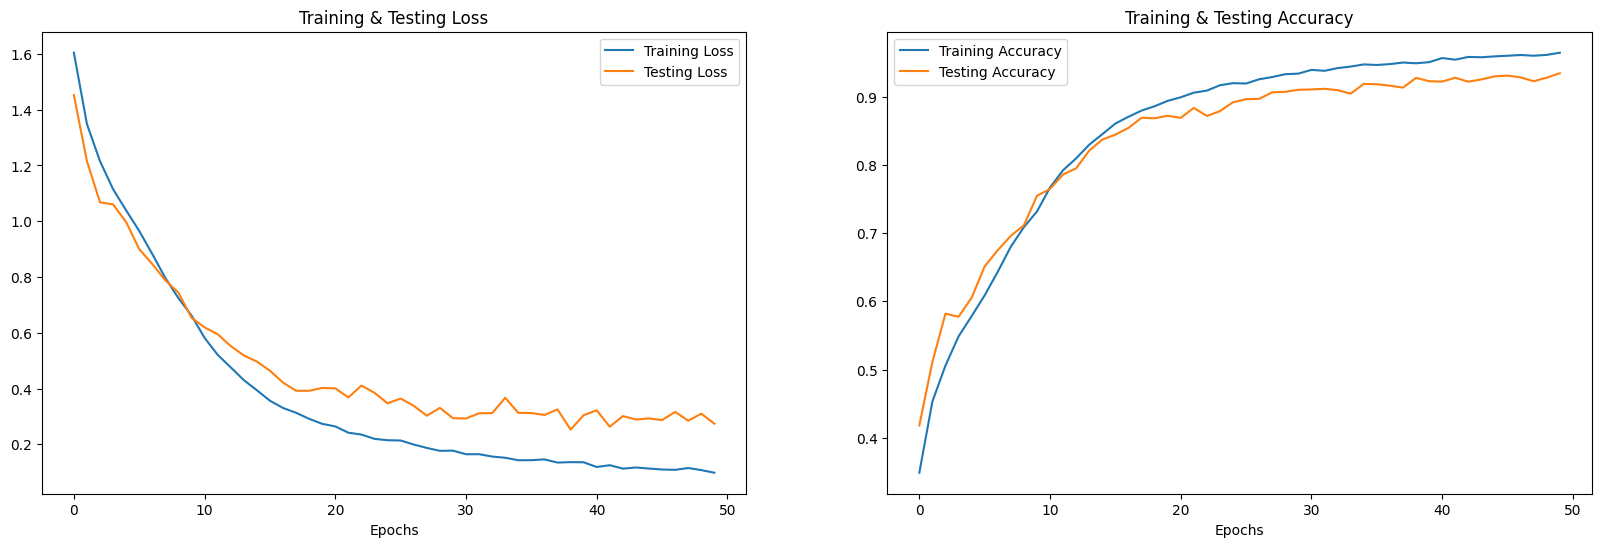

In [ ]:
print("Accuratezza del modello sui dati di test: " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['acc']
train_loss = history.history['loss']
test_acc = history.history['val_acc']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

305/305 [==============================] - 11s 34ms/step


In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,angry,angry
1,sad,sad
2,neutral,neutral
3,sad,sad
4,angry,angry
5,sad,sad
6,fear,fear
7,neutral,neutral
8,angry,angry
9,sad,sad


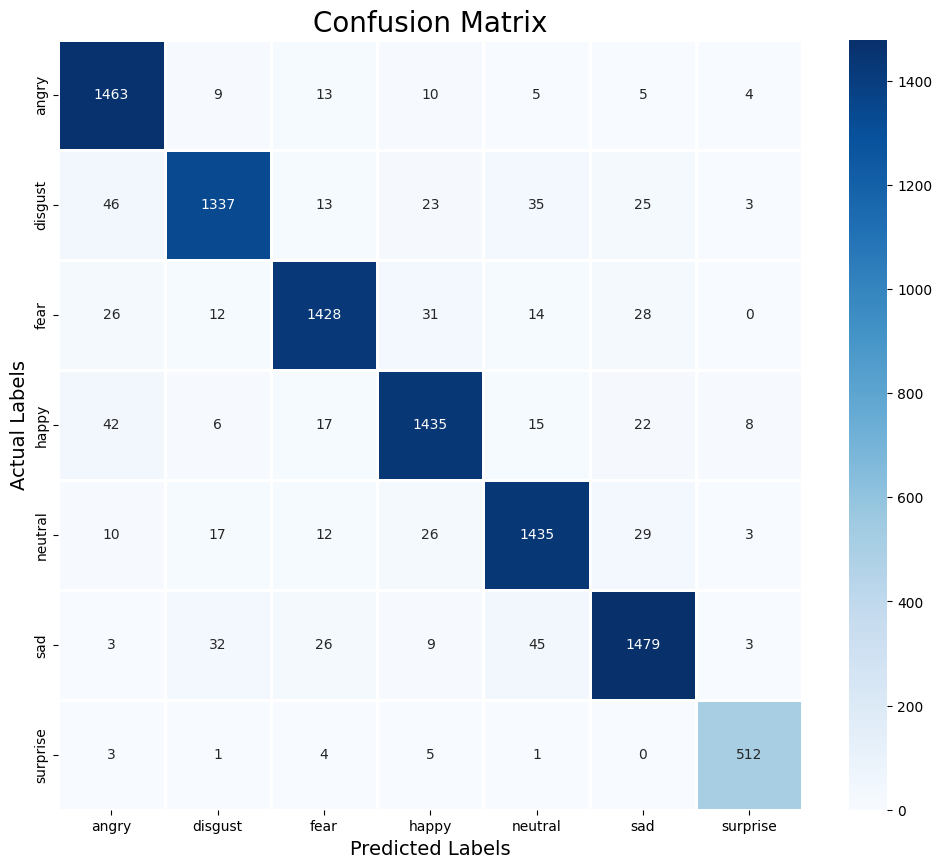

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.92      0.97      0.94      1509
     disgust       0.95      0.90      0.92      1482
        fear       0.94      0.93      0.94      1539
       happy       0.93      0.93      0.93      1545
     neutral       0.93      0.94      0.93      1532
         sad       0.93      0.93      0.93      1597
    surprise       0.96      0.97      0.97       526

    accuracy                           0.93      9730
   macro avg       0.94      0.94      0.94      9730
weighted avg       0.93      0.93      0.93      9730



# Saving model

In [ ]:
model.save(os.path.join('models','Speech_signal_features_V1_CNN.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
